In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df1=pd.read_csv(r"C:\Users\skraj\OneDrive\Desktop\Data Analytics\data sets\airlines_flights_data.csv")


In [ ]:
df1
df1.drop(columns="index",inplace=True)

In [27]:
df1.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df1[df1["duration"]==0.830000]   #filter for mn duration flight

In [ ]:
df1[df1["duration"]==49.830000	]   #filter for mn duration flight


In [31]:
df1[df1["price"]==123071.000000	]   #filter for max price flight


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [ ]:
df1.isnull().sum()

In [ ]:
#what are the airlines in this data set
df1["airline"].nunique()

6

In [36]:
df1["airline"].unique() #name of the flight


array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [ ]:
df1["airline"].value_counts()

In [38]:
df1["airline"].value_counts(ascending=True)

airline
SpiceJet       9011
AirAsia       16098
GO_FIRST      23173
Indigo        43120
Air_India     80892
Vistara      127859
Name: count, dtype: int64

Text(0, 0.5, 'Airline')

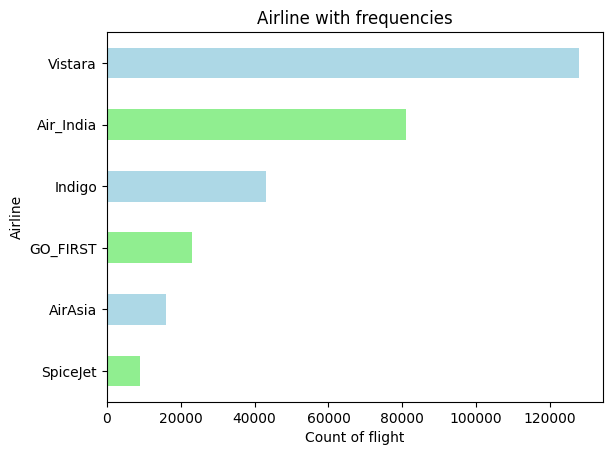

In [54]:
df1["airline"].value_counts(ascending=True).plot.barh(color=['lightgreen','lightblue'])
plt.title("Airline with frequencies")
plt.xlabel("Count of flight")
plt.ylabel("Airline")


In [ ]:
#show Bar graphs representing the departure Tiem and arrival time
df1["departure_time"].value_counts().plot.pie()

In [ ]:
df1["arrival_time"].value_counts().plot.pie(y=hash)

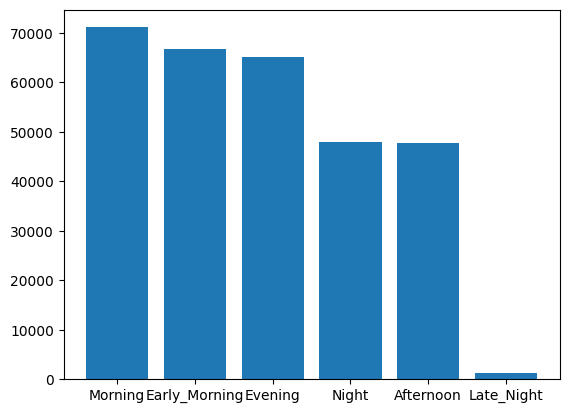

<BarContainer object of 6 artists>

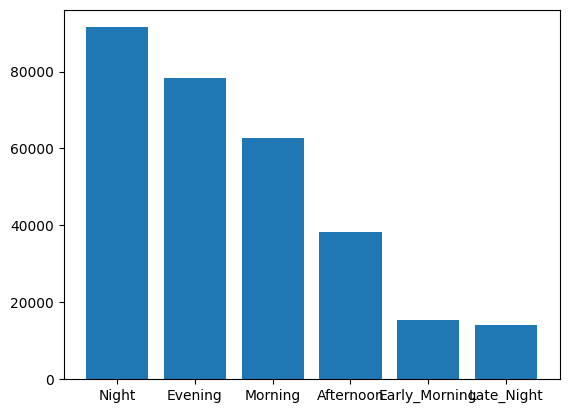

In [76]:
plt.Figure(figsize=(100,19))
plt.subplot(1,1,1)
plt.bar(df1["departure_time"].value_counts().index,df1["departure_time"].value_counts().values)
plt.show()
plt.subplot(1,1,1)
plt.bar(df1["arrival_time"].value_counts().index,df1["arrival_time"].value_counts().values)

In [ ]:
#show bar graph representing the source city & destination city
df1['source_city'].value_counts()


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [78]:
df1['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

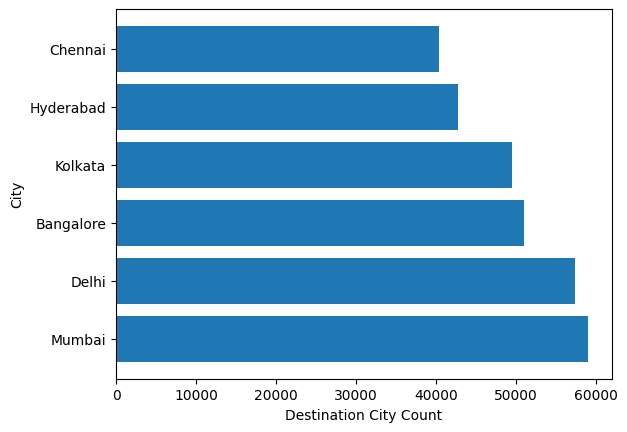

In [84]:
plt.Figure(figsize=(100,19))
plt.subplot(1,1,1)
plt.barh(df1['destination_city'].value_counts().index,df1['destination_city'].value_counts().values)
plt.xlabel("Destination City Count")
plt.ylabel("City")
plt.show()

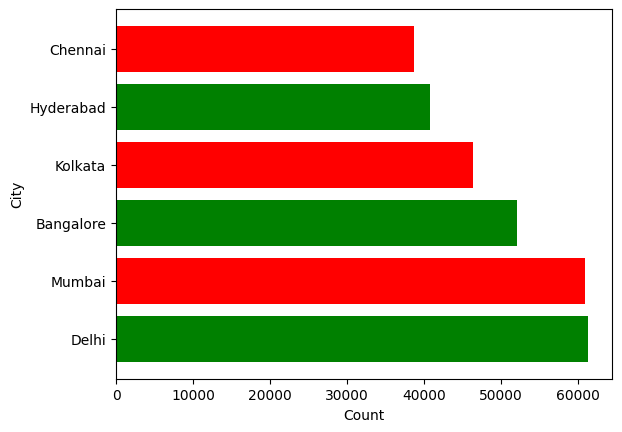

In [83]:
plt.Figure(figsize=(100,19))
plt.subplot(1,1,1)
plt.barh(df1['source_city'].value_counts().index,df1['source_city'].value_counts().values,color=["green","red"])
plt.xlabel("Count")
plt.ylabel("City")
plt.show()


In [ ]:
#groupby fu(nction
mean=round(df1.groupby('airline')['price'].mean(),2)


airline
AirAsia       4091.07
Air_India    23507.02
GO_FIRST      5652.01
Indigo        5324.22
SpiceJet      6179.28
Vistara      30396.54
Name: price, dtype: float64

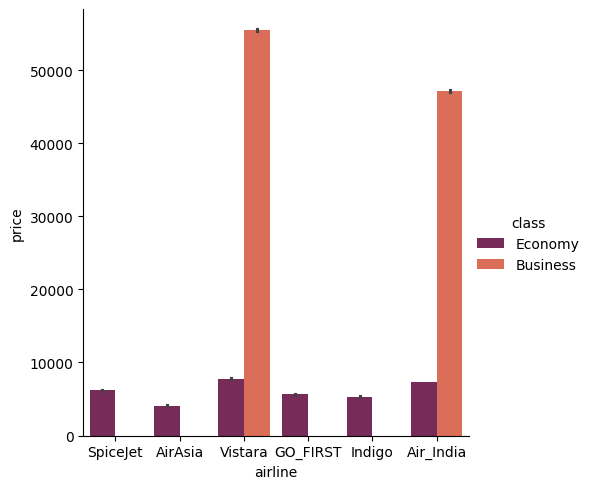

In [97]:
#drawing ga categorical plot showing mean ticket price for each airline

sns.catplot(x='airline',y='price',kind='bar',palette='rocket',data=df1,hue='class')


In [99]:
#Does the price vary change based on the depaarture time and arrival time

round(df1.groupby('departure_time')["price"].mean())

departure_time
Afternoon        18179.0
Early_Morning    20371.0
Evening          21232.0
Late_Night        9295.0
Morning          21631.0
Night            23062.0
Name: price, dtype: float64

C:\Users\skraj\AppData\Local\Temp\ipykernel_25724\399727986.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="departure_time",y="price",kind="bar",palette="rocket",data=df1)


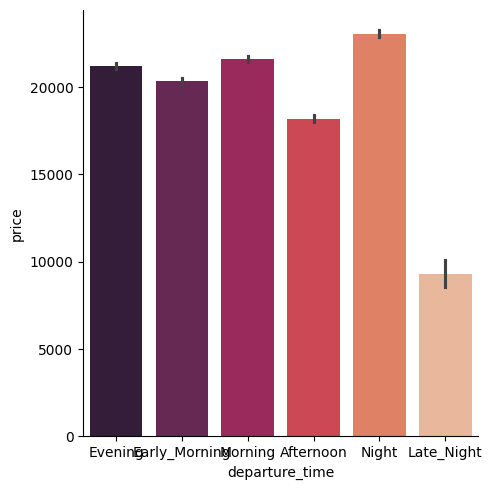

In [103]:
sns.catplot(x="departure_time",y="price",kind="bar",palette="rocket",data=df1)

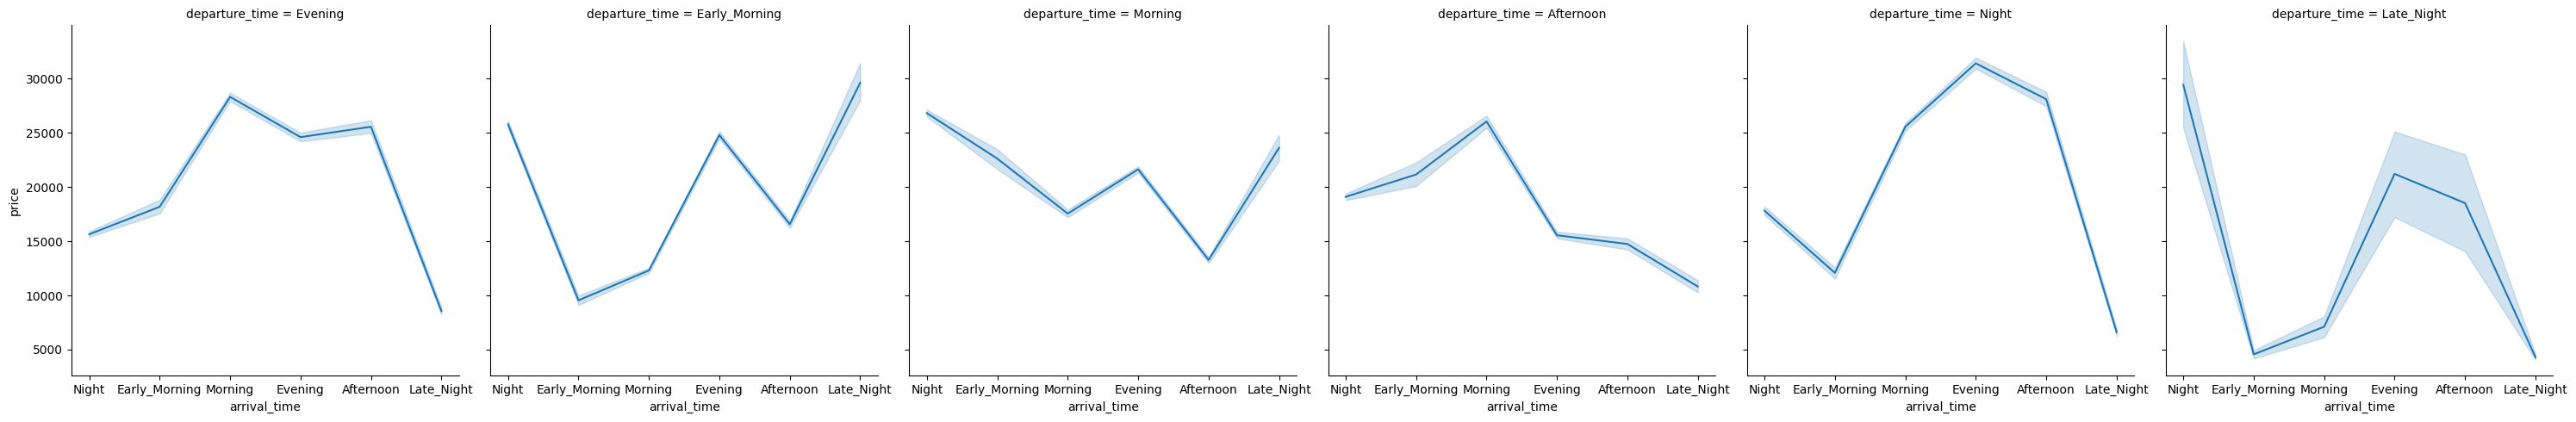

In [108]:
sns.relplot(x='arrival_time',y="price",data=df1,col="departure_time",legend="auto",kind="line")

In [109]:
#Checking the mean ticket price each source city

df1.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

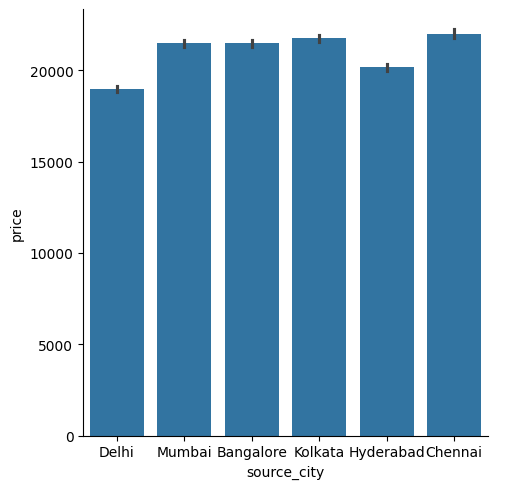

In [110]:
sns.catplot(x="source_city",y='price',data=df1,kind="bar")

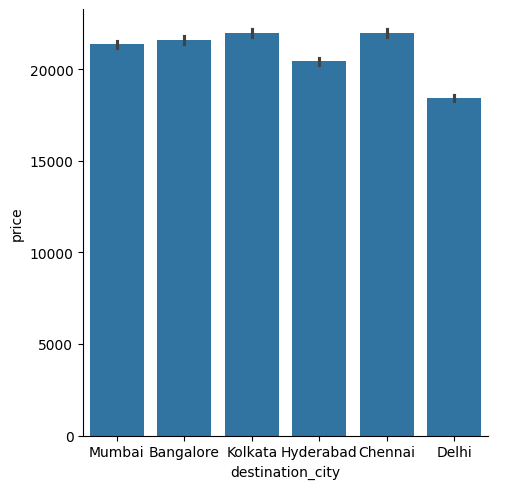

In [111]:
sns.catplot(x="destination_city",y='price',data=df1,kind="bar")

In [113]:
df1['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [114]:
df1.groupby("days_left")["price"].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

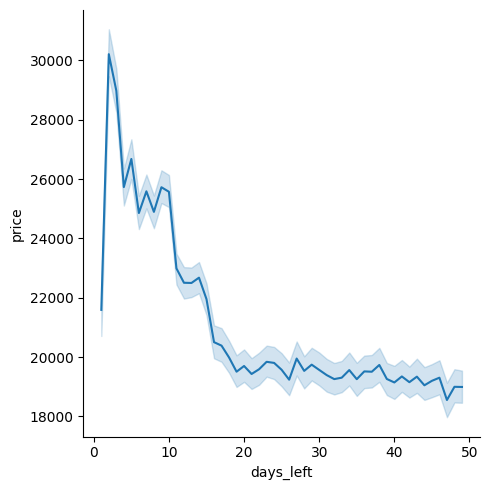

In [119]:
sns.relplot(x="days_left",y="price",data=df1,kind="line")

In [ ]:
#how does the price vary by class(business and Economy)
df1.groupby("class")['price'].mean()

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

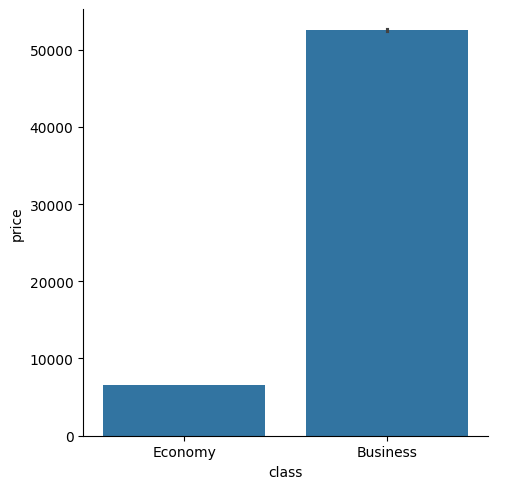

In [ ]:
sns.catplot(x="class",y="price",data=df1,kind="bar")

In [123]:
filter=df1[df1['class']=="Economy"]
filter.price.mean()

np.float64(6572.342383362527)

In [124]:
filter=df1[df1['class']=="Business"]
filter.price.mean()

np.float64(52540.08112357868)

In [154]:
data=(df1[(df1["airline"]=="Vistara") & (df1["source_city"]=="Delhi") &(df1["destination_city"]=="Hyderabad") &(df1["class"]=="Business")])

In [156]:
data['price'].mean()

np.float64(47939.840361445786)